# Telecommunication Data Analysis Project

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)<br/>
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Preprocessing](#section302)<br/>
4. [Questions](#section4)
    - 4.1 [How are customers distributed statewise?](#section401)<br/>
    - 4.2 [How are customers distributed city-wise?](#section402)<br/>
    - 4.3 [What is the distribution of various phone brands between customers?](#section403)<br/>
    - 4.4 [What is the gender distribution of customers?](#section404)<br/>
    - 4.5 [What is the distribution of customers by age group?](#section405)<br/>
    - 4.6 [Does the day of the week influence the usage of the network?](#section406)<br/>
    - 4.7 [How does the hour of the day influence mobile usage?](#section407)<br/>
    - 4.8 [Hypothesis 1 : Mobile network usage is influenced by time of day and day of the week](#section408)<br/>
    - 4.9 [Hypothesis 2 : A customers gender does not  influence the brand of phone they buy](#section409)<br/>
5. [Conclusions](#section5)<br/>  

<a id='section1'></a>
### 1. Problem Statement

This notebook explores the uses of various libraries in the __Exploratory Data Analysis(EDA)__ of our __telecom customer behavior__ data from a specific telecom service provider. This data will be analysed using some basic statistical tools and charts. 

Our end goal in this consulting assignment, will be to try and build a dashboard to understand the user's demographic characteristics based on their mobile usage, geolocation, and mobile device properties. Doing so will help developers and brand advertisers around the world pursue data-driven marketing efforts which are relevant to their users and catered to their preferences.

* __Exploratory Data Analysis__ <br/>
Understand the data by EDA and derive simple models with Pandas as baseline.
EDA ia a critical and first step in analyzing the data and we do this for below reasons :
    - Finding patterns in Data
    - Determining relationships in Data
    - Checking of assumptions
    - Detection of mistakes 

<a id='section2'></a>
### 2. Data Loading and Description

In this project we will be using multiple datasets and merging them so as to get a clearer picture of how they relate to eachother as well as be able to discover patterns between them.

We will be using mysql.connector to pull 2 data sets namely 'gender_age_train' and 'phone_brand_device_model'. We will also be using 'events_data' which we will read via csv file.


__1. gender_age_train :__
- The dataset consists of information about the gender and age of customers.
- The dataset comprises of __74645 observations of 4 columns__. Below is a table showing names of all the columns and their description.

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| device_id           | Phones device ID                                                 | 
| gender      | Gender of the customer                        |  
| age        | Age of the customer                                           | 
| group          | Combination of gender and age group of customer                                         |

__2. phone_brand_device_model :__
 - The dataset consists of information about the brand and model details of the phones along with their device IDs.
 - The dataset comprises of __87726 observations of 3 columns__. Below is a table showing names of all the columns and their description.
    
| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| device_id           | Phones device ID                                                 | 
| phone_brand      | Brand details of the phone                        |  
| device_model        | Model details of the phone                                           |


__3. events_data :__
  - The dataset consists of information about the event details of the phones along with their device IDs. An event is created any time a customer connected to a network uses their phone.
  - The dataset comprises of __370982 observations of 7 columns__. Below is a table showing names of all the columns and their description.
  
| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| event_id           | unique event ID                                                 | 
| device_id      | Phones device ID                        |  
| timestamp        | Timestamp indicating time of event creation                                           | 
| longitude          | Longitude at which event took place                                         |   
| latitude           | Latitude at which event took place                                          |
| city           | City at which event was created                                          |
| state         | State at which event was created |

It is important to note that the telecom service provider only provides service in only 7 states, namely:
   - Rajasthan 
   - Uttar Pradesh 
   - Telangana
   - Jharkhand
   - Haryana
   - Orissa 
   - Assam

#### Importing packages  

In [3]:
import mysql.connector as mysql                                  # Used to pull data using sql
import pandas as pd                                              # For data manipulation and analysis
import numpy as np                                               # Implemennts milti-dimensional array and matrices operations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True) 
import cufflinks as cf
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()

In [4]:
import json

#### Importing the Dataset

In [5]:
config = {
    'user' : 'student',
    'password' : 'student',
    'host' : 'cpanel.insaid.co',
    'database' : 'Capstone1',
    'raise_on_warnings' : True
}
cnx = mysql.connect(**config)

gender_age_train_df = pd.read_sql("SELECT * FROM gender_age_train",cnx);
print('gender_age_train data loaded. Data shape :'+str(gender_age_train_df.shape))

phone_brand_device_model_df = pd.read_sql("SELECT * FROM phone_brand_device_model",cnx);
print('phone_brand_device_model data loaded. Data shape :'+str(phone_brand_device_model_df.shape))

gender_age_train data loaded. Data shape :(74645, 4)
phone_brand_device_model data loaded. Data shape :(87726, 3)


Using mysql.connect, we have pulled the datasets __gender_age_train_df__ and __phone_brand_device_model_df__ and can begin to process them. The username and password have been blanked out for obvious reasons.

In [6]:
events_df = pd.read_csv('events_data (1).csv')
events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370982 entries, 0 to 370981
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   event_id   370982 non-null  int64  
 1   device_id  370982 non-null  int64  
 2   timestamp  370982 non-null  object 
 3   longitude  370982 non-null  float64
 4   latitude   370982 non-null  float64
 5   city       370982 non-null  object 
 6   state      370933 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 19.8+ MB


The above code is used to import our final dataset. We can now begin to profile our datasets.

<a id='section3'></a>
## 3. Data Profiling

- In the upcoming section we will first __understand our dataset__ using various pandas functionalities.
- Once we identify if there are any inconsistencies and shortcomings of the data, we will begin preprocessing it.
- In __preprocessing__, we will deal with erronous and missing values of columns. If necessary, we may also add columns to make analysis easier.
- We will also work on merging our datasets to be able to have a holistic view of all the columns and be able to understand how they correlate to eachother.

<a id='section301'></a>
### 3.1 Understanding the Data

__gender_age_train :__

In [7]:
gender_age_train_df.shape

(74645, 4)

In [8]:
gender_age_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   device_id  74645 non-null  int64 
 1   gender     74645 non-null  object
 2   age        74645 non-null  int64 
 3   group      74645 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [9]:
gender_age_train_df.head()

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


__phone_brand_device_model_df :__

In [10]:
phone_brand_device_model_df.shape

(87726, 3)

In [11]:
phone_brand_device_model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   device_id     87726 non-null  int64 
 1   phone_brand   87726 non-null  object
 2   device_model  87726 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [12]:
phone_brand_device_model_df.head()

,device_id,phone_brand,device_model
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,小米,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,三星,A368t
4,-2015528097870762664,小米,红米Note2


__events_df :__

In [13]:
events_df.shape

(370982, 7)

In [14]:
events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370982 entries, 0 to 370981
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   event_id   370982 non-null  int64  
 1   device_id  370982 non-null  int64  
 2   timestamp  370982 non-null  object 
 3   longitude  370982 non-null  float64
 4   latitude   370982 non-null  float64
 5   city       370982 non-null  object 
 6   state      370933 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 19.8+ MB


In [15]:
events_df.head()

,event_id,device_id,timestamp,longitude,latitude,city,state
0,616897,4112232520748712732,2016-05-06 23:07:41,78.566758,17.481422,Hyderabad,Telangana
1,2699320,4112232520748712732,2016-05-04 12:34:38,78.566758,17.481422,Hyderabad,Telangana
2,3232372,4112232520748712732,2016-05-04 11:08:31,78.566758,17.481422,Hyderabad,Telangana
3,617054,8845954542270213082,2016-05-07 23:34:30,78.493221,17.476113,Hyderabad,Telangana
4,1440290,8845954542270213082,2016-05-07 23:31:37,78.493221,17.476113,Hyderabad,Telangana


<a id='section302'></a>
### 3.2 Preprocessing

Now that we have gotten idea about our datasets, we can begin to merge them. On exploring them, we can see that the column __'device_id'__ is common in all three. We can use this column to be able to merge these datasets.

__Merging gender_age_train_df and phone_brand_device_model_df using inner join on device_id :__

In [16]:
phone_gender_df = pd.merge(gender_age_train_df,phone_brand_device_model_df,on='device_id')
phone_gender_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74617 entries, 0 to 74616
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   device_id     74617 non-null  int64 
 1   gender        74617 non-null  object
 2   age           74617 non-null  int64 
 3   group         74617 non-null  object
 4   phone_brand   74617 non-null  object
 5   device_model  74617 non-null  object
dtypes: int64(2), object(4)
memory usage: 4.0+ MB


__Merging phone_gender_df and events_df using inner join on device_id :__

In [17]:
merged_df = pd.merge(phone_gender_df,events_df,on='device_id')
merged_df.head(10)

,device_id,gender,age,group,phone_brand,device_model,event_id,timestamp,longitude,latitude,city,state
0,-2897161552818060146,M,35,M32-38,小米,MI 2,25631,2016-05-06 21:27:18,79.530079,28.856333,Baheri,UttarPradesh
1,-2897161552818060146,M,35,M32-38,小米,MI 2,61680,2016-05-06 21:59:34,79.530079,28.856333,Baheri,UttarPradesh
2,-2897161552818060146,M,35,M32-38,小米,MI 2,64607,2016-05-07 01:27:04,79.530079,28.856333,Baheri,UttarPradesh
3,-2897161552818060146,M,35,M32-38,小米,MI 2,66219,2016-05-07 00:21:34,79.530079,28.856333,Baheri,UttarPradesh
4,-2897161552818060146,M,35,M32-38,小米,MI 2,266505,2016-05-06 23:11:12,79.530079,28.856333,Baheri,UttarPradesh
5,-2897161552818060146,M,35,M32-38,小米,MI 2,323385,2016-05-07 21:56:15,79.530079,28.856333,Baheri,UttarPradesh
6,-2897161552818060146,M,35,M32-38,小米,MI 2,423213,2016-05-07 01:29:28,79.530079,28.856333,Baheri,UttarPradesh
7,-2897161552818060146,M,35,M32-38,小米,MI 2,528596,2016-05-06 21:39:42,79.530079,28.856333,Baheri,UttarPradesh
8,-2897161552818060146,M,35,M32-38,小米,MI 2,529034,2016-05-07 21:49:53,79.530079,28.856333,Baheri,UttarPradesh
9,-2897161552818060146,M,35,M32-38,小米,MI 2,563584,2016-05-07 22:24:48,79.530079,28.856333,Baheri,UttarPradesh


In [18]:
merged_df['device_id'].nunique()

12491

In [19]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370901 entries, 0 to 370900
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   device_id     370901 non-null  int64  
 1   gender        370901 non-null  object 
 2   age           370901 non-null  int64  
 3   group         370901 non-null  object 
 4   phone_brand   370901 non-null  object 
 5   device_model  370901 non-null  object 
 6   event_id      370901 non-null  int64  
 7   timestamp     370901 non-null  object 
 8   longitude     370901 non-null  float64
 9   latitude      370901 non-null  float64
 10  city          370901 non-null  object 
 11  state         370852 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 36.8+ MB


On examining the above table we can see that the column __'state'__ has missing values. Let's examine this further and see how we can rectify it. We can either choose to drop the rows which do not contain a value for state or we can find a way to replace the null values.

In [20]:
merged_df[merged_df['state'].isnull()]['device_id'].count()

49

In [21]:
merged_df[merged_df['state'].isnull()]

,device_id,gender,age,group,phone_brand,device_model,event_id,timestamp,longitude,latitude,city,state
36776,3848287267880940652,F,31,F29-32,小米,红米1S,171377,2016-05-05 09:01:19,75.836308,26.932726,Jaipur,NaN
36961,3848287267880940652,F,31,F29-32,小米,红米1S,1021033,2016-05-06 19:33:42,75.836308,26.932726,Jaipur,NaN
37042,3848287267880940652,F,31,F29-32,小米,红米1S,1512824,2016-05-05 15:01:12,75.836308,26.932726,Jaipur,NaN
37298,3848287267880940652,F,31,F29-32,小米,红米1S,2704219,2016-05-04 16:03:37,75.836308,26.932726,Jaipur,NaN
37371,3848287267880940652,F,31,F29-32,小米,红米1S,3034089,2016-05-04 19:23:44,75.836308,26.932726,Jaipur,NaN
37382,3848287267880940652,F,31,F29-32,小米,红米1S,3118444,2016-05-02 19:45:32,75.836308,26.932726,Jaipur,NaN
37415,3848287267880940652,F,31,F29-32,小米,红米1S,3243741,2016-05-06 18:43:36,75.836308,26.932726,Jaipur,NaN
80245,1177845145394796843,M,18,M22-,OPPO,1107,102939,2016-05-05 19:49:57,75.848364,26.953566,Jaipur,NaN
80265,1177845145394796843,M,18,M22-,OPPO,1107,156526,2016-05-02 18:06:07,75.848364,26.953566,Jaipur,NaN
80285,1177845145394796843,M,18,M22-,OPPO,1107,236100,2016-05-02 21:45:53,75.848364,26.953566,Jaipur,NaN


Luckily, as we can see above, the only rows which have the 'state' column null are those which have their 'city' as Jaipur. Since this is the case, we can deduce that the state value of these entries should be 'Rajastan'. Instead of dropping the rows we can simply replace the null values of state with the value of 'Rajastan'.

If this was not the case and there were multiple different state values that were missing, we would have to write a function to be able to fill these missing state values such as the one below:

In [22]:
def replace_missing_state(df):
    missing_state_city = df[df['state'].isnull()]['city'].unique()
    missing_state = []
    for city in missing_state_city:
        missing_state.append(df.loc[df['city'] == city]['state'].unique()[0])
    for i in range(0, len(missing_state)):
        cond = (df['city'] == missing_state_city[i])
        df.loc[cond, 'state'] = df.loc[cond, 'state'].fillna(missing_state[i])

In [23]:
merged_df['state'].fillna('Rajastan',inplace=True)
merged_df[merged_df['state'].isnull()].count()

device_id       0
gender          0
age             0
group           0
phone_brand     0
device_model    0
event_id        0
timestamp       0
longitude       0
latitude        0
city            0
state           0
dtype: int64

We have successfully replaced all null values in our dataset now and we can move on to check for duplicate rows.

In [24]:
merged_df.drop_duplicates()
merged_df.shape

(370901, 12)

Our dataset has not changed in shape which indicates to us that there are no duplicate rows present.

The next issue with our data is that we have multiple entries that correspond to a single device(device_id). This is because multiple events can be created per device. To simplify our dataset, we will create another dataframe which contains only unique values and uses the count() aggregate function.

In [25]:
unique_set = merged_df.groupby([
    'device_id', 
    'longitude', 
    'latitude', 
    'city', 
    'state', 
    'gender',
    'age',
    'group',
    'phone_brand'
]).count().reset_index()


In [26]:
unique_set.shape

(12500, 12)

In [27]:
unique_set.head()

,device_id,longitude,latitude,city,state,gender,age,group,phone_brand,device_model,event_id,timestamp
0,-9221639938103564513,75.816956,26.989676,Jaipur,Rajasthan,F,27,F27-28,OPPO,34,34,34
1,-9221086586254644858,77.937409,29.163193,Mawana,UttarPradesh,M,29,M29-31,vivo,2,2,2
2,-9220727250496861488,75.822490,26.979703,Jaipur,Rajasthan,M,29,M29-31,小米,117,117,117
3,-9215587397100788334,74.709805,26.521282,Ajmer,Rajasthan,M,26,M23-26,中国移动,9,9,9
4,-9214243372173201436,78.519156,17.451458,Hyderabad,Telangana,F,34,F33-42,vivo,3,3,3


Our next issue is that there are multiple values within the '__phone_brand__' column which are not in english. To be able to understand the data more easily, we will translate these values into their english equivalents.

In [28]:
unique_set['phone_brand'].unique()

array(['OPPO', 'vivo', '小米', '中国移动', '三星', '魅族', '华为', 'HTC', '酷派', '联想 ',
       '华硕', '努比亚', 'LG', '海信', '邦华', '富可视', '百加', '乐视', '米歌', 'TCL',
       '台电', '摩托罗拉', '唯米', '锤子', '易派', '金星数码', '大可乐', '优米', 'LOGO', '斐讯',
       '美图', '奇酷', '基伍', '康佳', '贝尔丰', '波导', '尼比鲁', '朵唯', 'ZUK', '亿通',
       '语信', '纽曼', '天语', '诺基亚', '爱派尔', '酷珀', '黑米', '一加', '至尊宝', '诺亚信',
       'Lovme', '酷比魔方', '欧博信', '酷比', '谷歌', '青橙', '聆韵', '海尔', '果米', '大Q',
       '欧比', '艾优尼', '夏新', 'E派', '米奇', '摩乐', '梦米', '沃普丰', 'SUGAR', '维图',
       '先锋', '白米', '优购', '西米', '糯米', '昂达', '恒宇丰', '长虹', '智镁', '飞利浦',
       '小杨树', '神舟', '百立丰', '欧奇', '奥克斯'], dtype=object)

In our case, we will be working with and analysing the top 10 most popular phone brands for simplicity. Due to this, we will only need to translate our 10 most popular phone brands to enlgish.

In [29]:
unique_set.groupby('phone_brand')['device_id'].count().sort_values(ascending=False).head(10)

phone_brand
小米      3130
三星      2786
华为      2068
vivo    1117
OPPO     936
魅族       774
酷派       582
HTC      203
联想       137
努比亚       94
Name: device_id, dtype: int64

In [30]:
brand_name_og = ['华为','小米','三星','魅族','酷派','乐视','联想 ','努比亚']
brand_name_en = ['Huawei','Xiaomi','Samsung','Meizu','Coolpad','LeEco','Lenovo','Nubian']
for i in range(0, 8):
    unique_set['phone_brand'] = unique_set['phone_brand'].replace(brand_name_og[i], brand_name_en[i])

In [31]:
unique_set.groupby('phone_brand')['device_id'].count().sort_values(ascending=False).head(10)

phone_brand
Xiaomi     3130
Samsung    2786
Huawei     2068
vivo       1117
OPPO        936
Meizu       774
Coolpad     582
HTC         203
Lenovo      137
Nubian       94
Name: device_id, dtype: int64

With the above code we were able to translate the top 10 most popular phone brands to english so that we could analyze the data more easily.

In [32]:
unique_set['state'].unique()

array(['Rajasthan', 'UttarPradesh', 'Telangana', 'Jharkhand', 'Haryana',
       'Orissa', 'Assam', 'Rajastan'], dtype=object)

On looking at the unique values of states, we see that the state __Rajasthan__ has an erroneous entry spelt '__Rajastan__'. To solve this issue, we will rename the entries with the incorrect spelling of Rajasthan.

In [33]:
unique_set.groupby('state').count()

,device_id,longitude,latitude,city,gender,age,group,phone_brand,device_model,event_id,timestamp
state,,,,,,,,,,,
Assam,483,483,483,483,483,483,483,483,483,483,483
Haryana,816,816,816,816,816,816,816,816,816,816,816
Jharkhand,739,739,739,739,739,739,739,739,739,739,739
Orissa,655,655,655,655,655,655,655,655,655,655,655
Rajastan,3,3,3,3,3,3,3,3,3,3,3
Rajasthan,3099,3099,3099,3099,3099,3099,3099,3099,3099,3099,3099
Telangana,3045,3045,3045,3045,3045,3045,3045,3045,3045,3045,3045
UttarPradesh,3660,3660,3660,3660,3660,3660,3660,3660,3660,3660,3660


In [34]:
unique_set[unique_set['state'] == 'Rajastan']

,device_id,longitude,latitude,city,state,gender,age,group,phone_brand,device_model,event_id,timestamp
2584,-5330178848098270007,75.894057,26.949746,Jaipur,Rajastan,F,23,F23-,Samsung,17,17,17
7005,1177845145394796843,75.848364,26.953566,Jaipur,Rajastan,M,18,M22-,OPPO,25,25,25
8821,3848287267880940652,75.836308,26.932726,Jaipur,Rajastan,F,31,F29-32,Xiaomi,7,7,7


In [35]:
unique_set['state'].replace('Rajastan','Rajasthan',inplace=True)

We also observe that the state '__Uttar Pradesh__' does not contain a space and is instead written as '__UttarPradesh__'. This will cause issues for us when we try and visualize the states on a map since we will be required to map the name of the state to our map shape file (.SHP). We will just add a space between the words for all data that has a state value of 'UttarPradesh'.

In [36]:
unique_set['state'].replace('UttarPradesh','Uttar Pradesh',inplace=True)
unique_set['state'].unique()

array(['Rajasthan', 'Uttar Pradesh', 'Telangana', 'Jharkhand', 'Haryana',
       'Orissa', 'Assam'], dtype=object)

<a id='section4'></a>
## 4. Questions

<a id='section401'></a>
### 4.1 How are customers distributed statewise?

In [37]:
import os
os.environ["PROJ_LIB"] = "F:\\Downloads\\Anaconda\\Library\\share"

In [38]:
from mpl_toolkits.basemap import Basemap

We have specified the __os.environ['PROJ_LIB']__ as Basemap requires us to point out the __epsg.py__ file for it to be imported. We will use Basemap to plot India and explore the state-wise distribution of customers on our telecom network's data.

In [39]:
import matplotlib.cm
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

F:\Downloads\Anaconda\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.

F:\Downloads\Anaconda\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.



(36,
 5,
 [68.18624877929699, 6.754255771636906, 0.0, 0.0],
 [97.41516113281256, 35.50133132934571, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x28ad254bd08>)

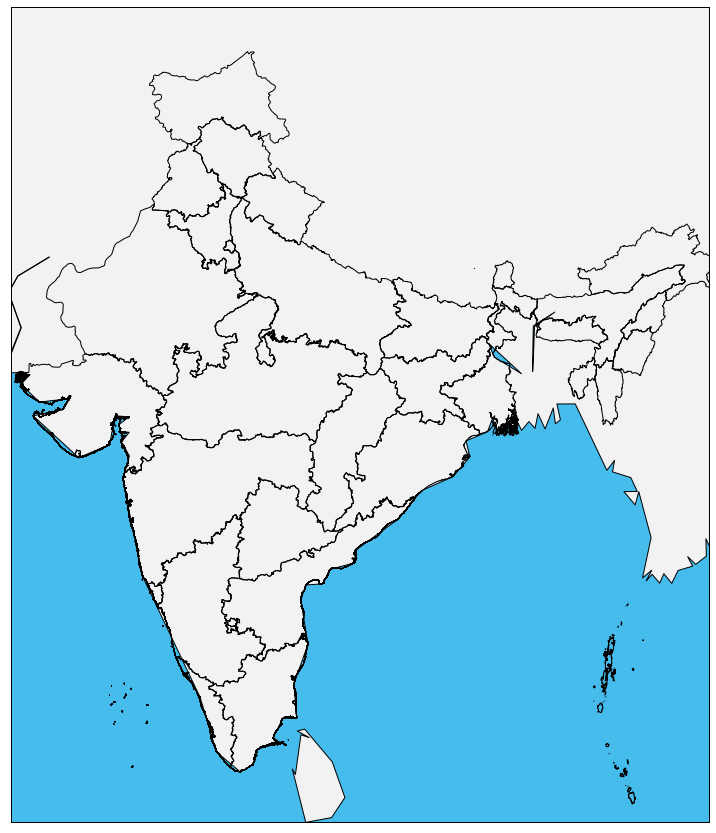

In [46]:
fig,ax = plt.subplots()
m = Basemap(resolution='c',projection='merc',lat_0=54.5,lon_0=-4.36,llcrnrlon=68.,llcrnrlat=6.,urcrnrlon=97.,urcrnrlat=37.)
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile('F:\\Downloads\\Anaconda\\Lib\\site-packages\\mpl_toolkits\\basemap\\IND_adm1','INDIA',linewidth=1)

We have successfully read our shape file and speciffied our basemap parameters such as our latitude,longitude and projection type. We will now move on to filling the states according to the number of customers(devices) in them. 

In [41]:
statewise_group = unique_set.groupby(by = 'state').count()
statewise_group.head(10)

,device_id,longitude,latitude,city,gender,age,group,phone_brand,device_model,event_id,timestamp
state,,,,,,,,,,,
Assam,483,483,483,483,483,483,483,483,483,483,483
Haryana,816,816,816,816,816,816,816,816,816,816,816
Jharkhand,739,739,739,739,739,739,739,739,739,739,739
Orissa,655,655,655,655,655,655,655,655,655,655,655
Rajasthan,3102,3102,3102,3102,3102,3102,3102,3102,3102,3102,3102
Telangana,3045,3045,3045,3045,3045,3045,3045,3045,3045,3045,3045
Uttar Pradesh,3660,3660,3660,3660,3660,3660,3660,3660,3660,3660,3660


In [42]:
count_list = []
states_grouped = statewise_group.reset_index()
state_count_group = states_grouped.groupby('state')
for key, group in state_count_group:
    count = 0
    for row in group.iterrows():
        #print(row[1][1])
        count += row[1][1]
    count_list.append((key,count))
print(count_list)

[('Assam', 483), ('Haryana', 816), ('Jharkhand', 739), ('Orissa', 655), ('Rajasthan', 3102), ('Telangana', 3045), ('Uttar Pradesh', 3660)]


In [43]:
countlist = []

for state_count in m.INDIA_info:
    count1 = 0
    for x in count_list:
        if x[0] == state_count['NAME_1']:
            count1 += x[1]
            break
    countlist.append(count1)

F:\Downloads\Anaconda\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.

F:\Downloads\Anaconda\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.



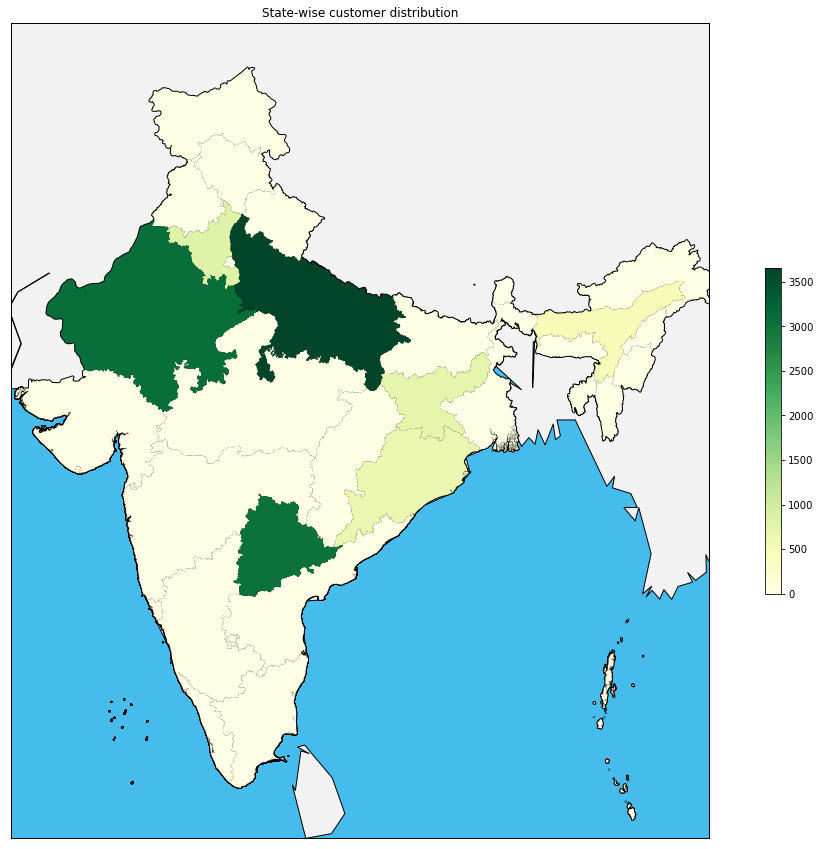

In [70]:
fig,ax = plt.subplots()
m = Basemap(resolution='c',projection='merc',lat_0=54.5,lon_0=-4.36,llcrnrlon=68.,llcrnrlat=6.,urcrnrlon=97.,urcrnrlat=37.)
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile('F:\\Downloads\\Anaconda\\Lib\\site-packages\\mpl_toolkits\\basemap\\IND_adm1','INDIA',linewidth=2)

df_poly = pd.DataFrame({'shapes':[Polygon(np.array(shape), True) for shape in m.INDIA],
                       'area':[area['NAME_1'] for area in m.INDIA_info],
                       'countlist': countlist})
##print(df_poly.head())

shapes = [Polygon(np.array(shape), True) for shape in m.INDIA]
cmap = plt.get_cmap('YlGn')
#cmap = plt.get_cmap('YlGnBu')
#cmap = plt.get_cmap('Oranges')
#cmap = plt.get_cmap('YlOrRd')

pc = PatchCollection(shapes, zorder=2)

norm = Normalize()
pc.set_facecolor(cmap(norm(df_poly['countlist'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(cmap=cmap)
mapper.set_array(countlist)
plt.colorbar(mapper, shrink=0.4)

ax.set_title('State-wise customer distribution')
plt.rcParams['figure.figsize'] = [20,15]
plt.show()

From the above graph we can see the distribution of customers across the 7 states. __Uttar Pradesh__ has the highest concetration of customers followed by __Rajasthan__ and __Telangana__.

<a id='section402'></a>
### 4.2 How are customers distributed city-wise

In [49]:
citywise_group = unique_set.groupby(by = 'city')['device_id'].count().sort_values(ascending=False)
city_top10 = citywise_group.head(10)
city_top10

city
Hyderabad      3045
Jaipur         1551
Lakhimpur        56
Fatehpur         51
Gonda            48
Diphu            46
Bhubaneswar      45
Sherkot          44
Nagaur           44
Silchar          43
Name: device_id, dtype: int64

Text(0.5, 1.0, 'Distribution of customers across cities')

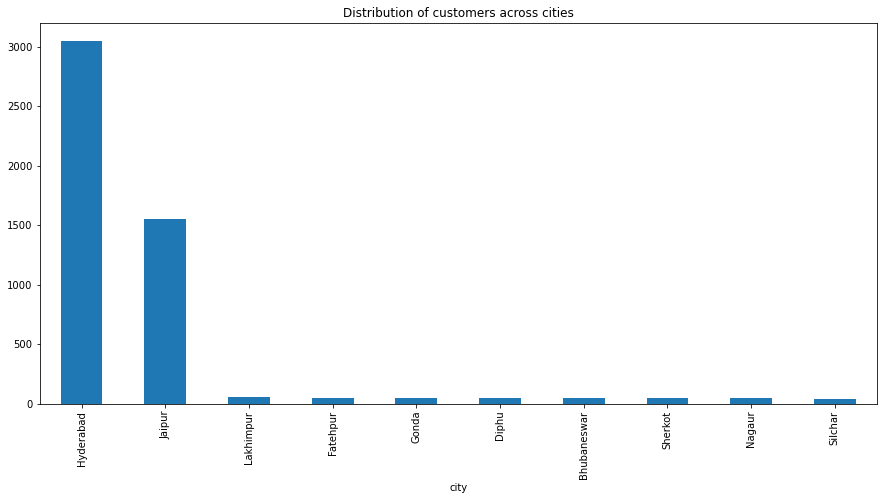

In [50]:
city_top10.head(10).plot(kind='bar', figsize=(15,7))
plt.title('Distribution of customers across cities')

From the above barplot, we can see that there are clearly two cities, __Hyderabad__ and __Jaipur__, that are the most highly populated with customers. Though the state __Uttar Pradesh__ has the most customers overall, it is spread amongst multiple cities throughout the state whereas a state like telangana has all of it's customers located in __Hyderabad__.

<a id='section403'></a>
### 4.3 What is the distribution of various phone brands between customers?

In [51]:
phone_brand_top10 = unique_set.groupby('phone_brand')['device_id'].count().sort_values(ascending=False)
phone_brand_top10.head(10)

phone_brand
Xiaomi     3130
Samsung    2786
Huawei     2068
vivo       1117
OPPO        936
Meizu       774
Coolpad     582
HTC         203
Lenovo      137
Nubian       94
Name: device_id, dtype: int64

Text(0.5, 1.0, 'Distribution of customers across top 10 phone brands')

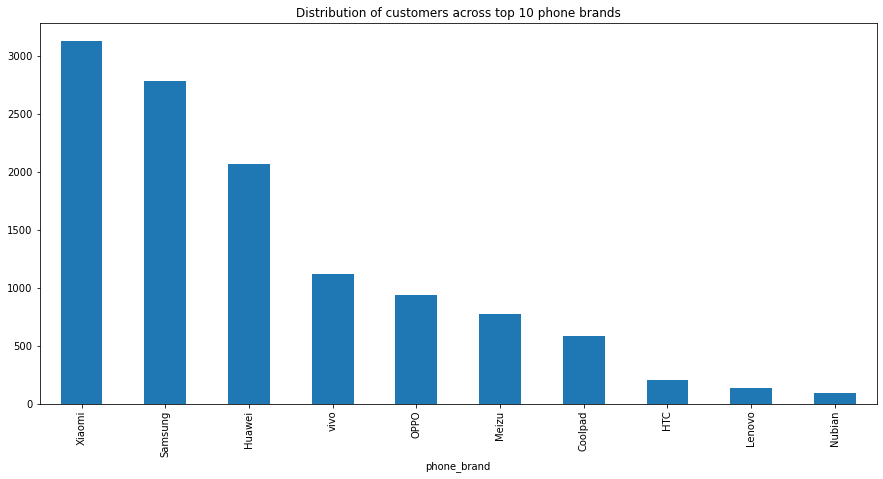

In [52]:
phone_brand_top10.head(10).plot(kind='bar', figsize=(15,7))
plt.title('Distribution of customers across top 10 phone brands')

The most popular phone brand is '__Xiaomi__' followed by '__Samsung__' and '__Huawei__'. We will only be looking at the top 10 most popular phone brands in this notebook.

<a id='section404'></a>
### 4.4 What is the gender distribution of customers?

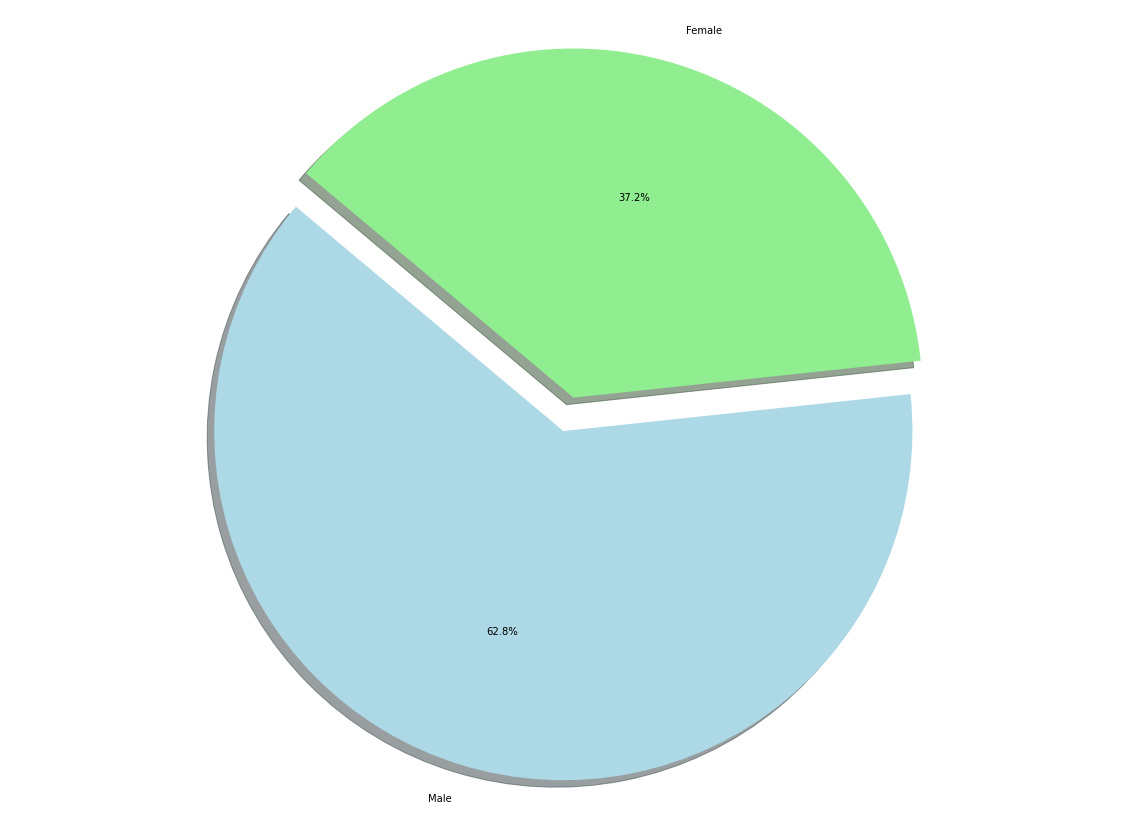

In [68]:
# Distribution of customers by gender
labels = 'Male','Female'
sizes = unique_set['gender'].value_counts()
colors = ['lightblue', 'lightgreen']
explode = (0.1, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

According to our data, the majority (62.8%) of user are __male__. The number of males are close to 8000 and the females are only about 4500.

Lets dive a little deeper into this gender distribution and see if there are certain brands that are preferred by males and females. We will look at the top 10 most popular phone brands and see if the ratio of males to females remains the same as above or there is a preference based on gender.

In [78]:
unique_set['gender'].value_counts()

M    7850
F    4650
Name: gender, dtype: int64

In [111]:
phone_gender_group = unique_set[unique_set['phone_brand'].isin(['Huawei','Xiaomi','Samsung','Meizu','Coolpad','LeEco','Lenovo','Nubian'])]
temp = phone_gender_group.groupby(['phone_brand','gender']).count()
temp

device_id  longitude  latitude  city  state   age  group  \
phone_brand gender                                                             
Coolpad     F             198        198       198   198    198   198    198   
            M             384        384       384   384    384   384    384   
Huawei      F             786        786       786   786    786   786    786   
            M            1282       1282      1282  1282   1282  1282   1282   
LeEco       F              27         27        27    27     27    27     27   
            M              61         61        61    61     61    61     61   
Lenovo      F              41         41        41    41     41    41     41   
            M              96         96        96    96     96    96     96   
Meizu       F             250        250       250   250    250   250    250   
            M             524        524       524   524    524   524    524   
Nubian      F              28         28        28    28     28    28     28   
            M              66         66        66    66     66    66     66   
Samsung     F            1084       1084      1084  1084   1084  1084   1084   
            M            1702       1702      1702  1702   1702  1702   1702   
Xiaomi      F            1123       1123      1123  1123   1123  1123   1123   
            M            2007       2007      2007  2007   2007  2007   2007   

                    device_model  event_id  timestamp  
phone_brand gender                                     
Coolpad     F                198       198        198  
            M                384       384        384  
Huawei      F                786       786        786  
            M               1282      1282       1282  
LeEco       F                 27        27         27  
            M                 61        61         61  
Lenovo      F                 41        41         41  
            M                 96        96         96  
Meizu       F                250       250        250  
            M                524       524        524  
Nubian      F                 28        28         28  
            M                 66        66         66  
Samsung     F               1084      1084       1084  
            M               1702      1702       1702  
Xiaomi      F               1123      1123       1123  
            M               2007      2007       2007

In [110]:
list1 = []
sum1 = 0
gend_bool = ['M','F']
final_df = pd.DataFrame(data= ['Coolpad','Huawei','LeEco','Lenovo','Meizu','Nubian','Samsung','Xiaomi'], columns = ['Phone Brand'])
for x in phone_brand_list: 
    for y in gend_bool:
        temp_var = temp.loc[(x,y),'device_id']
        if y == 'M':
            male_count = temp_var
        else:
            female_count = temp_var
    sum1 = male_count + female_count
    female_pct = female_count/sum1
    male_pct = male_count/sum1 
    list1.append(str(male_pct.round(2)) + '/' + str(female_pct.round(2)))
final_df['male/female'] = list1
final_df

,Phone Brand,male/female
0,Coolpad,0.66/0.34
1,Huawei,0.62/0.38
2,LeEco,0.69/0.31
3,Lenovo,0.7/0.3
4,Meizu,0.68/0.32
5,Nubian,0.7/0.3
6,Samsung,0.61/0.39
7,Xiaomi,0.64/0.36


From the above table we can see that though there may be some phone brands that are appear to be __slightly__ influenced by gender such as Lenovo, LeEco and Nubian, it is insufficient evidence for us to assume that there is a strong correlation between a specific phone brand and gender.

<a id='section405'></a>
### 4.5 What is the distribution of customers by age group?

Text(0.5, 1.0, 'Distribution of users across age segment')

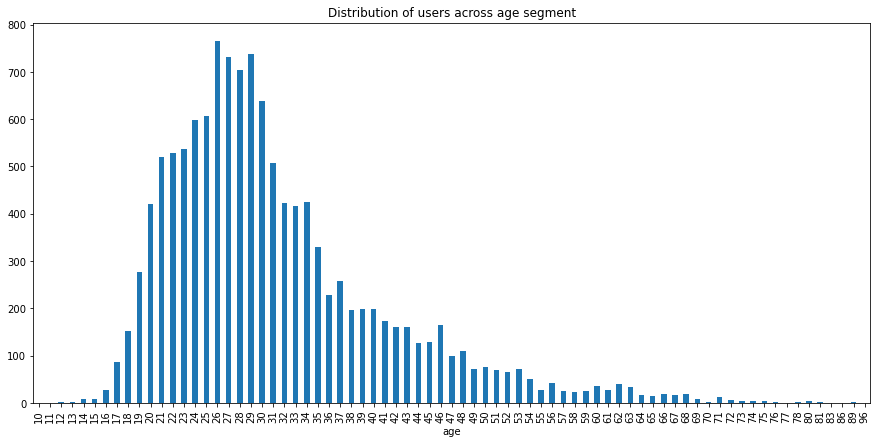

In [56]:
age_group = unique_set.groupby('age')['device_id'].count()
age_group.plot(kind='bar', figsize=(15,7))
plt.title('Distribution of users across age segment')

As we can see, customers are usually aged between __20__ and __30__, peaking at 26 and slowly taper off as they get older.

<a id='section406'></a>
### 4.6 Does the day of the week influence the usage of the network?

In [57]:
merged_df.head()

,device_id,gender,age,group,phone_brand,device_model,event_id,timestamp,longitude,latitude,city,state
0,-2897161552818060146,M,35,M32-38,小米,MI 2,25631,2016-05-06 21:27:18,79.530079,28.856333,Baheri,UttarPradesh
1,-2897161552818060146,M,35,M32-38,小米,MI 2,61680,2016-05-06 21:59:34,79.530079,28.856333,Baheri,UttarPradesh
2,-2897161552818060146,M,35,M32-38,小米,MI 2,64607,2016-05-07 01:27:04,79.530079,28.856333,Baheri,UttarPradesh
3,-2897161552818060146,M,35,M32-38,小米,MI 2,66219,2016-05-07 00:21:34,79.530079,28.856333,Baheri,UttarPradesh
4,-2897161552818060146,M,35,M32-38,小米,MI 2,266505,2016-05-06 23:11:12,79.530079,28.856333,Baheri,UttarPradesh


In [58]:
timestamp_df = merged_df
timestamp_df['timestamp'] = pd.to_datetime(timestamp_df['timestamp'],yearfirst=True)
time = timestamp_df['timestamp'][0]
time.hour

21

With the above code, we convert the __timestamp__ column to datetime. By doing this we will be able to easily access attributes such as hour,month,day etc.

In [59]:
def func(x):
    hourlist = []
    monthlist = []
    dowlist = []
    for i in x:
       ## print(type(i))
        hourlist.append(i.hour)
        monthlist.append(i.month)
        dowlist.append(i.dayofweek)
    timestamp_df['Hour'] = hourlist
    timestamp_df['Month'] = monthlist
    timestamp_df['Day of Week'] = dowlist

In [60]:
timestamp_df['Hour'] = timestamp_df['timestamp'].apply(lambda time: time.hour)
timestamp_df['Month'] = timestamp_df['timestamp'].apply(lambda time: time.month)
timestamp_df['Day of Week'] = timestamp_df['timestamp'].apply(lambda time: time.dayofweek)

In [61]:
timestamp_df.head()

,device_id,gender,age,group,phone_brand,device_model,event_id,timestamp,longitude,latitude,city,state,Hour,Month,Day of Week
0,-2897161552818060146,M,35,M32-38,小米,MI 2,25631,2016-05-06 21:27:18,79.530079,28.856333,Baheri,UttarPradesh,21,5,4
1,-2897161552818060146,M,35,M32-38,小米,MI 2,61680,2016-05-06 21:59:34,79.530079,28.856333,Baheri,UttarPradesh,21,5,4
2,-2897161552818060146,M,35,M32-38,小米,MI 2,64607,2016-05-07 01:27:04,79.530079,28.856333,Baheri,UttarPradesh,1,5,5
3,-2897161552818060146,M,35,M32-38,小米,MI 2,66219,2016-05-07 00:21:34,79.530079,28.856333,Baheri,UttarPradesh,0,5,5
4,-2897161552818060146,M,35,M32-38,小米,MI 2,266505,2016-05-06 23:11:12,79.530079,28.856333,Baheri,UttarPradesh,23,5,4


Now that we have created new columns for hour, month and day of week, notice that day of week is numerical. To make this easier to understand and analyze, we will map the numerical values into string values.

In [62]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
timestamp_df['Day of Week'] = timestamp_df['Day of Week'].map(dmap)
timestamp_df.head()

,device_id,gender,age,group,phone_brand,device_model,event_id,timestamp,longitude,latitude,city,state,Hour,Month,Day of Week
0,-2897161552818060146,M,35,M32-38,小米,MI 2,25631,2016-05-06 21:27:18,79.530079,28.856333,Baheri,UttarPradesh,21,5,Fri
1,-2897161552818060146,M,35,M32-38,小米,MI 2,61680,2016-05-06 21:59:34,79.530079,28.856333,Baheri,UttarPradesh,21,5,Fri
2,-2897161552818060146,M,35,M32-38,小米,MI 2,64607,2016-05-07 01:27:04,79.530079,28.856333,Baheri,UttarPradesh,1,5,Sat
3,-2897161552818060146,M,35,M32-38,小米,MI 2,66219,2016-05-07 00:21:34,79.530079,28.856333,Baheri,UttarPradesh,0,5,Sat
4,-2897161552818060146,M,35,M32-38,小米,MI 2,266505,2016-05-06 23:11:12,79.530079,28.856333,Baheri,UttarPradesh,23,5,Fri


Now that our the days of the week are converted into a more readable format, we can proceed to answer our question of how days of the week influence customer's mobile usage.

No handles with labels found to put in legend.


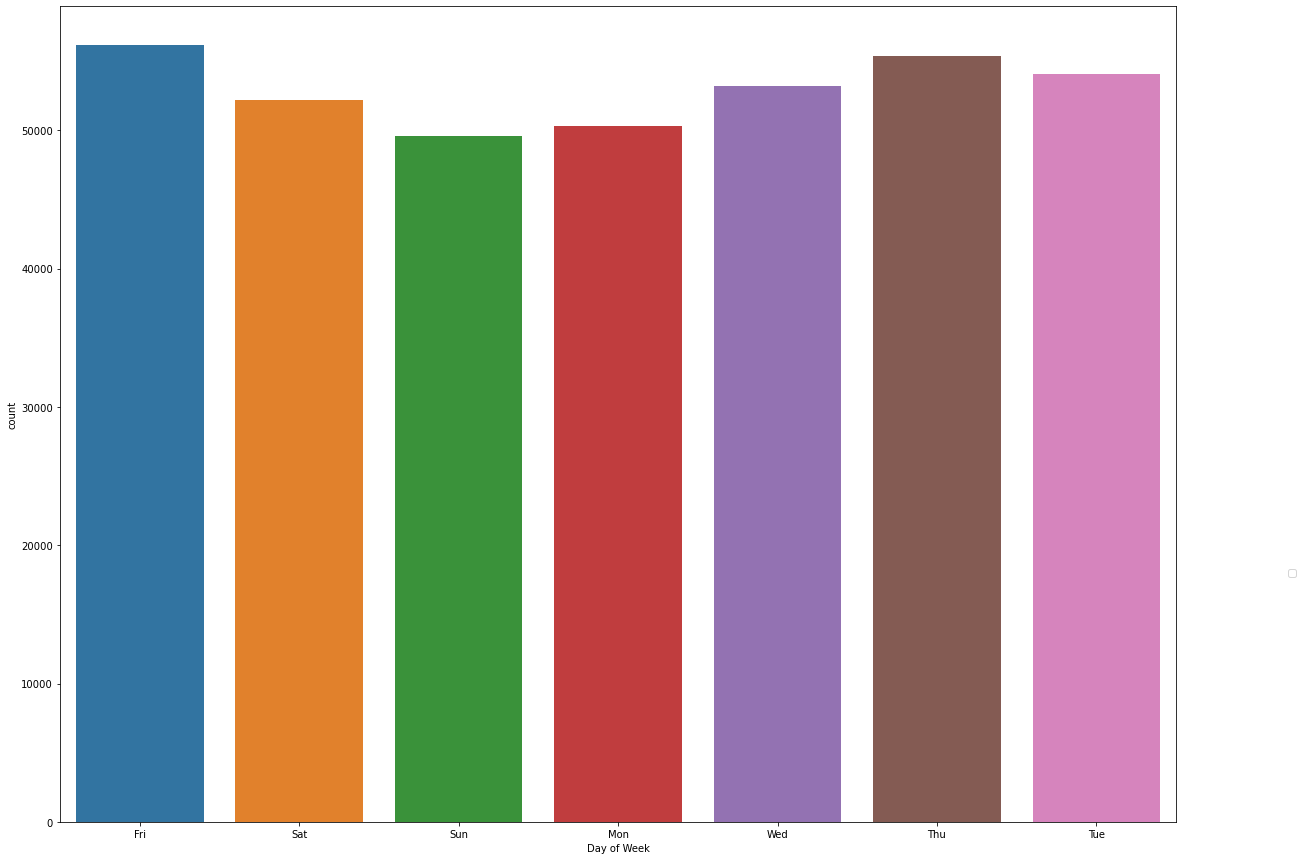

In [63]:
sns.countplot(x='Day of Week',data=timestamp_df)
plt.legend(loc=(1.1,0.3))

The bar plot above shows us how the day of the week correlates to mobile phone usage. Though __Friday__ seems to show the highest usage followed by __Thursday__, it is not by a very large amount. __Sunday__ and __Monday__ have the lowest measures of usage.

<a id='section407'></a>
### 4.7 How does the hour of the day influence mobile usage?

No handles with labels found to put in legend.


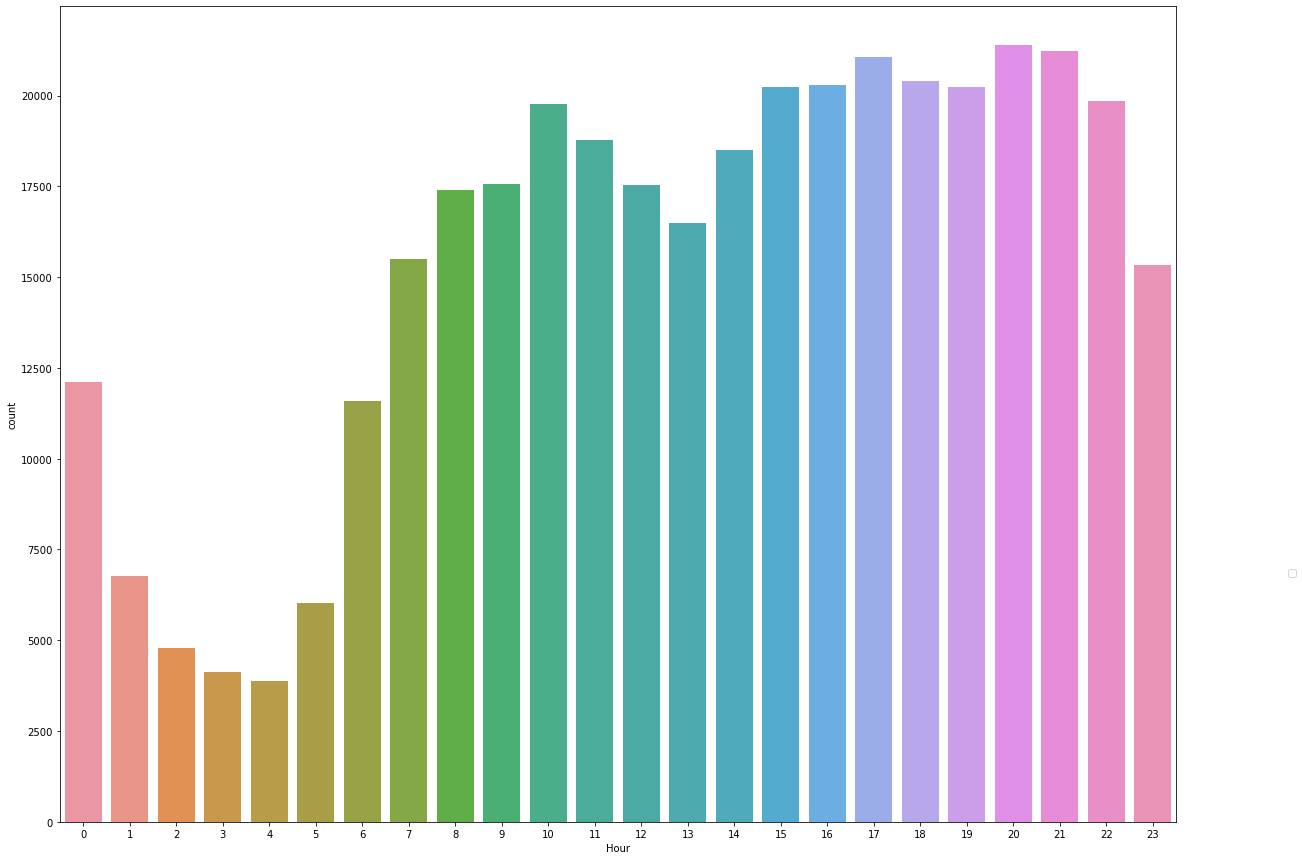

In [64]:
sns.countplot(x='Hour',data=timestamp_df)
plt.legend(loc=(1.1,0.3))

Similarly to the influence of __Day of Week__ on mobile phone usage, the graph above shows us how the time of day correlates to mobile usage. Between __15:00__ and __22:00__, mobile usage on the network is high. From __23:00__ to __4:00__ there appears to be a sharp decrease in the amount of usage after which there is a rise in usage again until __10:00__.

<a id='section408'></a>
### 4.8 Hypothesis 1 : Mobile network usage is influenced by time of day and day of the week

On studying the questions 4.6 we can observe that:
 - __Day of week__ does not seem to have any strong correlation to mobile network use.
 - Though Friday and Thursday do have the highest amount of network usage, it is not an amount that we can deduce a strong correlation from.
 
Studying the question 4.7, we observe that:
 - Certain times of the day have higher network usage than others.
 - The network usage peaks at around 20:00 and is lowest at around 4:00. There is a gradual decrease after 20:00 until 4:00 after which there is a rise in usage.
- This tells us that __Hour__ does seem to have an influence on network usage. 

From these findings we can say that day of the week does not seem to have any influence on network usage whereas the time of day does.

<a id='section409'></a>
### 4.9 Hypothesis 2 : A customers gender does not  influence the brand of phone they buy

On studying the question 4.4 we know:
 - 62.7% of the customers are male and 37.2% are female.
 - This shows that a majority of customers are male, regardless of phone brand.

In [112]:
final_df

,Phone Brand,male/female
0,Coolpad,0.66/0.34
1,Huawei,0.62/0.38
2,LeEco,0.69/0.31
3,Lenovo,0.7/0.3
4,Meizu,0.68/0.32
5,Nubian,0.7/0.3
6,Samsung,0.61/0.39
7,Xiaomi,0.64/0.36


The table above shows the split between men and women for each brand of phone. As we can see, though there are some brands that are skewed in terms of gender, it is almost proportional to the percentage of men and women customers.

From these findings we can say that gender __does not__ seem to influence or strongly correlate to the phone brand that the customer purchases.

<a id='section5'></a>
## 5. Conclusion 

- In this notebook, we used various numerical and visualization libraries to perform an Exploratory Data Analysis of telecom customer data.
- We made use of packages like __pandas and seaborn__ to develop better insights about the data.<br/>
- We have also seen how __preproceesing__ helps in dealing with __missing__ and __erroneous__ values and irregualities present in the data. We also _created new features_ which in turn help us to better understand the data.
- We used Basemap to be able to visualize geographical data and better understand the spread of our data.
- We saw the impact of features like _state, city, timestamp,  and age_ on the usage of mobile devices on the network.
- Lastly, We were able to deduce how features are correlated to mobile usage and how certain values are more important to focus on if we want to see increased mobile usage.<br/><br/>

__Actionable insights :__
- With respect to the focus on certain states, the company has a couple of different approaches they can take:
    1. Focus on states which already have a large number of customers and therefore high usage of their services. This would involve the company focusing efforts to draw in more customers in states in which they already have a large customer base. In our case, this would mean trying to increase the scale of services in states like Uttar Pradesh and Rajasthan.
    2. Expand operations in states in which they do not have as many customers. This would allow the company to be less dependant on only a few states. This would involve scaling up their operations in states such as Haryana, Assam or even expanding to states that they do not yet service.
- In terms of cities, similar to the approaches the company could take with state-wise focus, it could also either focus on cities which already utilize their services to a larger extent or focus on cities that do not utilize them to the same extent.
- Regardless of the route the company decides to take, it should take into consideration both the state and the city before making the decision. As we saw, though certain cities like Hyderabad have a large number of customers, there are still states like Uttar Pradesh which does not have any singular city that has a large number of customers but has more customers than Telangana spread over a larger number of cities.
- The company should also understand and cater to the demographic of their users. We were able to see that most of their users ages ranged between 20-30, peaking at 26. Their customer base is largely male as well which again gives the company the choice of either catering to the majority of their demographic or expanding it.
- Using these insights, networks service providers will be able to understand their customer base better and also be able to take informed decisions in regards to the future of their business.